                                                            Final Project

Project Overview:

The purpose of this project is to see the relationship of GDP (Gross domestic product) and Net Exports of Goods and Services (NETEXP) for the entire U.S. The macroeconomics theory states that there is a positive relationship between GDP and NETEXP. In this project, we have time series data of price level and NETEXP for the U.S. We will use linear regression analysis to test this theory.

Project Structure:

The project will start by providing a data report. The data report will explain where the data comes from and how to access the data.

The second part of the project will provide summary statistics about GDP and NETEXP trends and provide visualizations of these statistics to help further illustrate the project.

The third part of the project will state a hypothesis and compared with trends in previous scholarship. Then, a linear regression will be performed to test the hypothesis and the results will be stated. Lastly, there will be a detailed discussion of the results and how it follows or goes against previous scholarship.

Data Report:

The data for this project comes from the Federal Reserve Economic Data website (FRED). FRED provides monthly data on the U.S. GDP (where we will commute inflation), inflation, Net Exports of Goods and Services (NETEXP), Government Consumption Expenditures and Gross Investment (GCE) (it will serve as a control variable in our analysis) from 1948 onward, and it identifies times of periods of economic contraction. The data can be accessed at https://fred.stlouisfed.org/ 

Key Variables:

The four key variables are U.S. GDP, inflation, Net Exports of Goods and Services (NETEXP), Government Consumption Expenditures and Gross Investment (GCE). FRED defines GDP as the following: “Gross domestic product (GDP), the featured measure of U.S. output, is the market value of the goods and services produced by labor and property located in the United States.” The data presents the statement based on 50 states, the District of Columbia, and U.S. military installations, embassies, and consulates abroad. To calculate GDP, we will use expenditures approach to sum up goods and services sold to final users. The index measures price changes (from a predetermined reference date). In addition to the original unadjusted index distributed, the Bureau of Labor Statistics also releases a seasonally adjusted index. The unadjusted series reflects all factors that may influence a change in prices. However, it can be very useful to look at the seasonally adjusted GDP, which removes the effects of seasonal changes, such as weather or holidays.

Inflation rate is defined as the percentage change in CPI from one period to the previous period: inflation=(GDP_t-GDP_t-1)/GDP_t-1.

FRED defines Net Exports of Goods and Services (NETEXP) as the following: “Net exports of goods and services is the difference between U.S. exports of goods and services.”

FRED defines the Government Consumption Expenditures and Gross Investment (GCE) as the following: “Government consumption expenditures and gross investment is the measure of the portion of final expenditures that is accounted for by the government sector.” 


In [16]:
#Key Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

In [54]:
#Access Data
url = 'https://fred.stlouisfed.org/series/GDP/downloaddata/GDP.csv'
data = pd.read_csv(url, parse_dates=True)
data.head()

,DATE,VALUE
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [55]:
data.columns=['DATE','GDP']

In [56]:
data.head()

,DATE,GDP
0,1947-01-01,243.164
1,1947-04-01,245.968
2,1947-07-01,249.585
3,1947-10-01,259.745
4,1948-01-01,265.742


In [57]:
#summary stats for GDP 
data.describe()

,GDP
count,295.000000
mean,6346.288305
std,6434.597480
min,243.164000
25%,739.757000
50%,3794.706000
75%,10841.079500
max,21747.394000


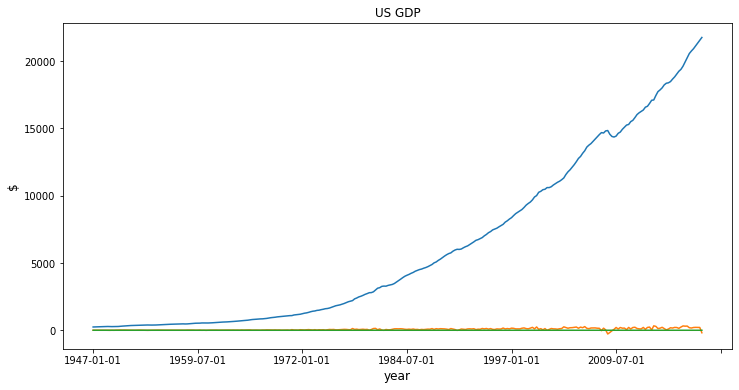

In [68]:
#Graphing the GDP 
data_d=data.set_index('DATE')
ax = data_d['1947':'2020'].plot(title='US GDP', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('$', fontsize=12)
plt.show()

In [69]:
data['DGDP']=data['GDP'].diff()
data.head()

,DATE,GDP,DGDP,INFLATION
0,1947-01-01,243.164,NaN,0.011531
1,1947-04-01,245.968,2.804,0.014705
2,1947-07-01,249.585,3.617,0.040708
3,1947-10-01,259.745,10.160,0.023088
4,1948-01-01,265.742,5.997,0.025683


In [70]:
data['DGDP'][:-1]=data['DGDP'][1:]
data.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,DATE,GDP,DGDP,INFLATION
0,1947-01-01,243.164,2.804,0.011531
1,1947-04-01,245.968,3.617,0.014705
2,1947-07-01,249.585,10.160,0.040708
3,1947-10-01,259.745,5.997,0.023088
4,1948-01-01,265.742,6.825,0.025683


In [71]:
data['INFLATION']=data['DGDP']/data['GDP']
data.head()

,DATE,GDP,DGDP,INFLATION
0,1947-01-01,243.164,2.804,0.011531
1,1947-04-01,245.968,3.617,0.014705
2,1947-07-01,249.585,10.160,0.040708
3,1947-10-01,259.745,5.997,0.023088
4,1948-01-01,265.742,6.825,0.025683


In [72]:
#summary stats of infation 
data['INFLATION'].describe()

count    295.000000
mean       0.015606
std        0.013868
min       -0.094662
25%        0.009846
50%        0.014531
75%        0.021125
max        0.083889
Name: INFLATION, dtype: float64

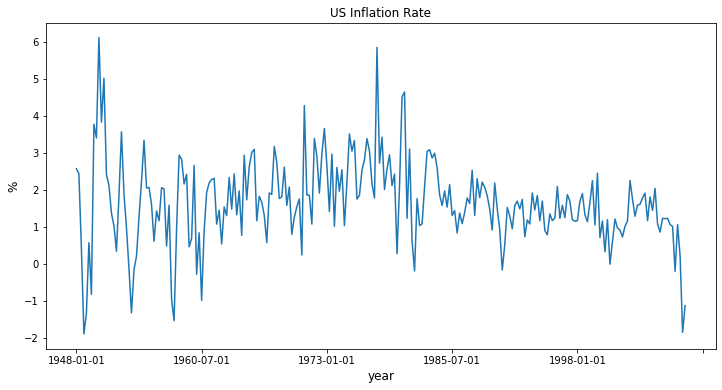

In [73]:
#Graphing for the inflation 
data1=data[['DATE','INFLATION']]
data1=data1.set_index('DATE')
data1['INFLATION']=data1['INFLATION']*100
ax = data1['1948':'2009'].plot(title='US Inflation Rate', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()

In [74]:
#Access Data
url_c = 'http://research.stlouisfed.org/fred2/series/FGEXPND/downloaddata/FGEXPND.csv'
data_c = pd.read_csv(url_c, parse_dates=True)
data_c.head()

,DATE,VALUE
0,1947-01-01,40.902
1,1947-04-01,40.346
2,1947-07-01,42.007
3,1947-10-01,38.149
4,1948-01-01,38.915


In [75]:
data_c.columns=['DATE', 'EXPND']
data_c.head()

,DATE,EXPND
0,1947-01-01,40.902
1,1947-04-01,40.346
2,1947-07-01,42.007
3,1947-10-01,38.149
4,1948-01-01,38.915


In [76]:
#Summary Statistics for EXPND
data_c.describe()

,EXPND
count,295.000000
mean,1393.694973
std,1512.689674
min,38.149000
25%,125.786000
50%,864.300000
75%,2110.616500
max,9107.088000


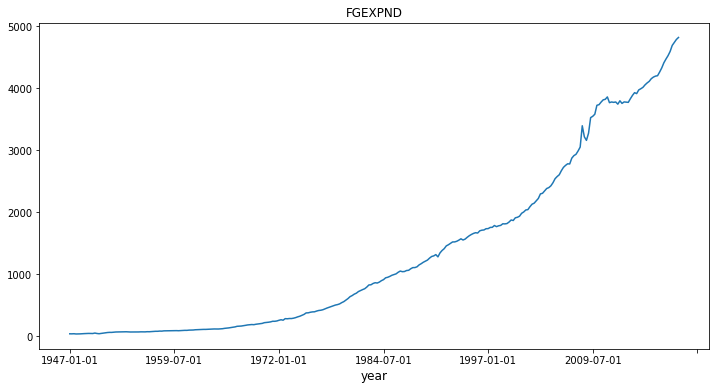

In [77]:
#Graphing FGEXPND
data_c1=data_c.set_index('DATE')
ax = data_c1['1947':'2020'].plot(title='FGEXPND', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
plt.show()

In [78]:
#Access Data
url_r = 'http://research.stlouisfed.org/fred2/series/NETEXP/downloaddata/NETEXP.csv'
data_r = pd.read_csv(url_r, parse_dates=True)
data_r.head()

,DATE,VALUE
0,1947-01-01,10.875
1,1947-04-01,11.294
2,1947-07-01,11.770
3,1947-10-01,9.289
4,1948-01-01,7.293


In [79]:
data_r.columns=['DATE', 'NETEXP']
data_r.head()

,DATE,NETEXP
0,1947-01-01,10.875
1,1947-04-01,11.294
2,1947-07-01,11.770
3,1947-10-01,9.289
4,1948-01-01,7.293


In [80]:
#Summary Statistics for NETEXP
data_r.describe()

,NETEXP
count,295.000000
mean,-180.451627
std,248.460625
min,-805.630000
25%,-393.433500
50%,-32.788000
75%,1.699500
max,21.582000


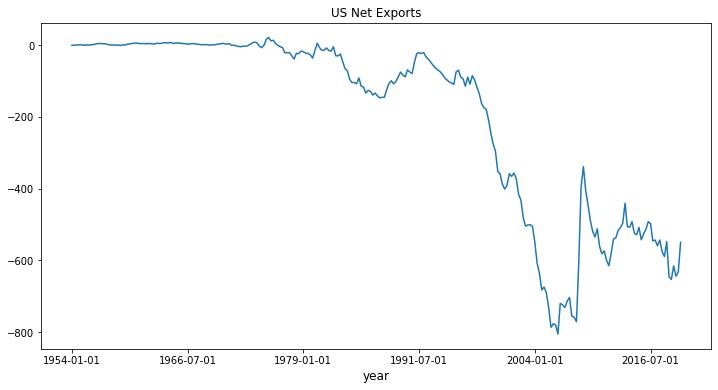

In [81]:
#Graphing Federal Net Exports
data_r1=data_r.set_index('DATE')
ax = data_r1['1954':'2020'].plot(title='US Net Exports', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
plt.show()

In [82]:
#Access Data
url_r = 'http://research.stlouisfed.org/fred2/series/CBI/downloaddata/CBI.csv'
data_r = pd.read_csv(url_r, parse_dates=True)
data_r.head()

,DATE,VALUE
0,1947-01-01,0.495
1,1947-04-01,-1.240
2,1947-07-01,-2.917
3,1947-10-01,1.456
4,1948-01-01,3.626


In [83]:
data_r.columns=['DATE', 'CBI']
data_r.head()

,DATE,CBI
0,1947-01-01,0.495
1,1947-04-01,-1.240
2,1947-07-01,-2.917
3,1947-10-01,1.456
4,1948-01-01,3.626


In [84]:
#Summary Statistics for NETEXP
data_r.describe()

,CBI
count,295.000000
mean,19.425624
std,44.309558
min,-298.356000
25%,3.028500
50%,11.326000
75%,34.242000
max,175.648000


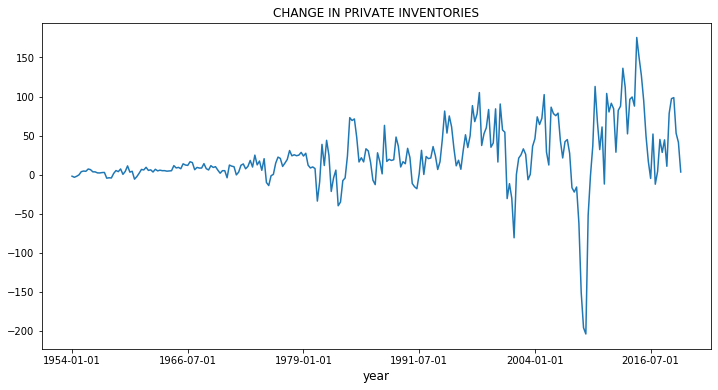

In [85]:
#Graphing Federal CHANGE IN PRIVATE INVENTORIES
data_r1=data_r.set_index('DATE')
ax = data_r1['1954':'2020'].plot(title='CHANGE IN PRIVATE INVENTORIES', legend=False, figsize=(12,6))
ax.set_xlabel('year', fontsize=12)
plt.show()

In [86]:
data_merge=pd.merge(data, data_c, how='inner', on='DATE', left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)

In [87]:
data_merge.head()

,DATE,GDP,DGDP,INFLATION,EXPND
0,1947-01-01,243.164,2.804,0.011531,40.902
1,1947-04-01,245.968,3.617,0.014705,40.346
2,1947-07-01,249.585,10.160,0.040708,42.007
3,1947-10-01,259.745,5.997,0.023088,38.149
4,1948-01-01,265.742,6.825,0.025683,38.915


In [88]:
data_merge['NETEXP']=data_merge['EXPND']
data_merge.head()

,DATE,GDP,DGDP,INFLATION,EXPND,NETEXP
0,1947-01-01,243.164,2.804,0.011531,40.902,40.902
1,1947-04-01,245.968,3.617,0.014705,40.346,40.346
2,1947-07-01,249.585,10.160,0.040708,42.007,42.007
3,1947-10-01,259.745,5.997,0.023088,38.149,38.149
4,1948-01-01,265.742,6.825,0.025683,38.915,38.915


In [89]:
data_merge['CBI']=data_merge['NETEXP']
data_merge.head()

,DATE,GDP,DGDP,INFLATION,EXPND,NETEXP,CBI
0,1947-01-01,243.164,2.804,0.011531,40.902,40.902,40.902
1,1947-04-01,245.968,3.617,0.014705,40.346,40.346,40.346
2,1947-07-01,249.585,10.160,0.040708,42.007,42.007,42.007
3,1947-10-01,259.745,5.997,0.023088,38.149,38.149,38.149
4,1948-01-01,265.742,6.825,0.025683,38.915,38.915,38.915
